In [1]:
import pandas as pd

rf = pd.read_csv("sorted_df_var_202505252114.csv")
print(rf)
# Print column data types
print(rf.dtypes)

lstm = pd.read_csv("best_KGE_result.csv")
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)
print(lstm.dtypes)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13311450           1098  0.357845 -0.174490  0.598202   
2            2  13311000           1101  0.386968 -0.117419  0.622068   
3            3  13154500           2088  0.410202 -0.041550  0.640470   
4            4  13092747           1377  0.484580 -0.071572  0.696118   
5            5  13211205            753  0.529429 -0.309338  0.727619   
6            6  13311250           1012  0.537925 -0.007768  0.733434   
7            7  13317660           1748  0.596277  0.045260  0.772190   
8            8  13192200            820  0.671238  0.227463  0.819291   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [2]:
merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')
#merged_df['KGE_y'] = merged_df['KGE_y']#.astype('float64')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)


merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'KGE_x', 'KGE_y'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print(merged_df)

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
    site_no  Random Forest   LSTM
0  13311000       0.939221  0.946
1  13154500       0.729285  0.970
2  13317660       0.915618  0.968
3  13310850       0.904339  0.953
4  13307000       0.909612  0.948
5  13342500       0.752785  0.942
6  13340600       0.943870  0.944
7  13340000       0.945548  0.970


In [3]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'col': [[0.97042483], [0.82398472], [0.12345678]]
})

print(df)

# Convert list with single float to plain float
df['col'] = df['col'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

print(df)


            col
0  [0.97042483]
1  [0.82398472]
2  [0.12345678]
        col
0  0.970425
1  0.823985
2  0.123457


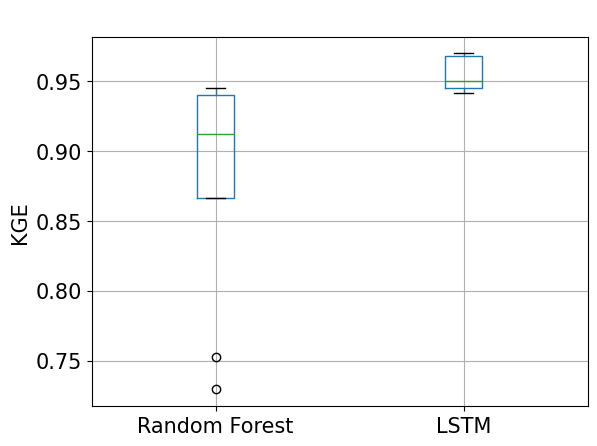

In [9]:


import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15

merged_df[[ 'Random Forest', 'LSTM']].boxplot()
plt.title(" ")
plt.ylabel("KGE")

# Save the figure
plt.savefig("kge.png")  # Saves as a PNG file

plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Create boxplot

merged_df[['RMSE', 'rmse']].boxplot()
plt.title("Boxplot of col1 and col2")
plt.ylabel("Values")
plt.show()

KeyError: "None of [Index(['RMSE', 'rmse'], dtype='object')] are in the [columns]"

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
df_melted =  merged_df[['KGE_x', 'KGE_y']].melt(var_name='Variable', value_name='Value')

# Create boxplot
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title("Boxplot of col1 and col2")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import numpy as np
import pandas as pd
np.random.seed(42)
data = pd.DataFrame({
    'group': np.repeat(['A', 'B'], 50),
    'value': np.concatenate([
        np.random.normal(loc=5, scale=1, size=50),
        np.random.normal(loc=6, scale=1.2, size=50)
    ])
})

# Create boxplot
sns.boxplot(x='group', y='value', data=data, whis=1.5, width=0.4, fliersize=0)

# Overlay each data point
sns.stripplot(x='group', y='value', data=data, color='black', size=4, jitter=True)

plt.title("Boxplot with Individual Points")
plt.show()
